# Epistasis Pipeline

Use an Epistasis Pipeline to fit the nonlinear scale with a power transform, then estimate the high-order epistasis coefficients with a linear regression.

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from gpmap import GenotypePhenotypeMap
from epistasis.models import (EpistasisPowerTransform, 
                              EpistasisLinearRegression,
                              EpistasisPipeline)

from epistasis.pyplot import plot_power_transform, plot_coefs

Load data into a GenotypePhenotypeMap.

In [10]:
gpm = GenotypePhenotypeMap.read_json("../data/nonlinear-epistasis-dataset.json")

Create a pipeline and fit the models. 

In [11]:
# Initialize the model
model = EpistasisPipeline([
    EpistasisPowerTransform(lmbda=2, A=1, B=1),
    EpistasisLinearRegression(order=4)
])
model.add_gpm(gpm)

# Fit the model.
model.fit()

[EpistasisPowerTransform(model_type='global'),
 EpistasisLinearRegression(model_type='global', n_jobs=1, order=4)]

Plot the nonlinear scale.

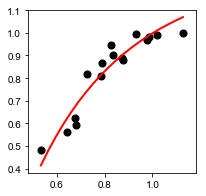

In [16]:
fig, ax = plt.subplots(figsize=(3,3))
plot_power_transform(model[0], ax=ax)

Plot the coefficients.

(<matplotlib.figure.Figure at 0x1a169dcef0>,
  <matplotlib.axes._subplots.AxesSubplot at 0x1a171e8f60>])

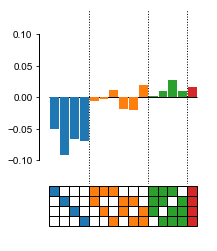

In [17]:
plot_coefs(model[1], figsize=(3,4))